Quick CDF illustration for Ex 4.2, AOS

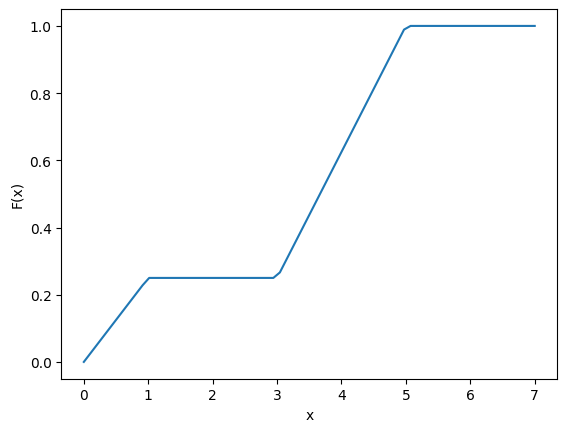

In [2]:
import matplotlib.pyplot as plt 
import numpy as np

def F_x(x):
    if x < 0:
        return 0
    elif x < 1:
        return x/4
    elif x < 3:
        return 1/4
    elif x < 5:
        return 1/4 + (3*x/8 - 9/8)
    else:
        return 1
    
    
vec = np.linspace(0, 7, 70)

vec_CDF = [F_x(i) for i in vec]

plt.plot(vec, vec_CDF)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()

Problem 4.13 AOS

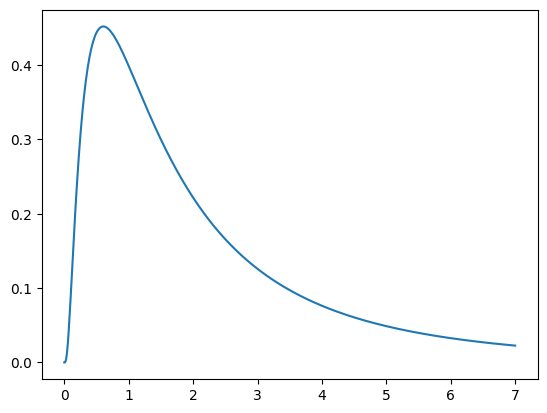

In [6]:
# first, let just plot the pdf
def f_y(y):
    if y > 0:
        return ((1/np.sqrt(y*2*np.pi))*np.exp( -np.log(y)**2/2 ))
    else:
        return 0
    
    
vec = np.linspace(0, 7, 500)

vec_PDF = [f_y(i) for i in vec]

plt.plot(vec, vec_PDF)
plt.show()

Then let's simulate a bunch of random numbers and compute the empirical PDF

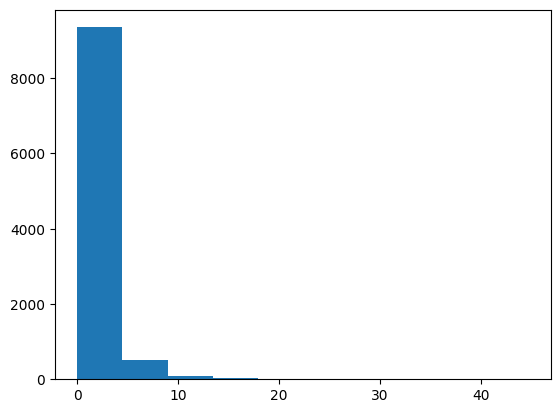

In [7]:
n = 10000

x = np.random.standard_normal(n)

y = [np.exp(i) for i in x]

plt.hist(y)
plt.show()


Then let's compute empirical distribution function

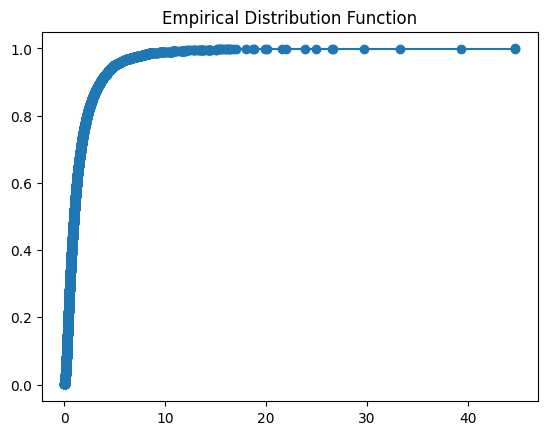

In [8]:
from utils import makeEDF, plotEDF

my_edf = makeEDF(y)
my_edf

plotEDF(my_edf)

Exercise 3.4

In [24]:
def random_walk(n_steps=100000, p=0.2, n_trials=1, x0=0):

    # randomly choose 1 or -1, w.p. p and 1-p, respectievly
    X = x0+ np.random.choice([1, -1], size=(n_trials, n_steps), p=[p, 1-p])
    
    # positions after n_steps
    Xn = x0 + X.sum()#(axis=1)
    
    # compute empirical estimats 
    empirical_mean = np.mean(X)
    empirical_var  = np.var(X)
    
    # comp with theory
    theo_mean = x0 + n_steps * (2*p - 1)
    theo_var  = 4 * n_steps * p * (1 - p)
    
    print(f"Empirical mean: {empirical_mean:.4f}, Theoretical mean: {theo_mean:.4f}")
    print(f"Empirical var : {empirical_var:.4f}, Theoretical var : {theo_var:.4f}")
    
    #return Xn

random_walk()


Empirical mean: -0.6016, Theoretical mean: -60000.0000
Empirical var : 0.6381, Theoretical var : 64000.0000


Now let's do an illustration of the CLT. Let's create a large sample from some distribution (for example Poisson) 

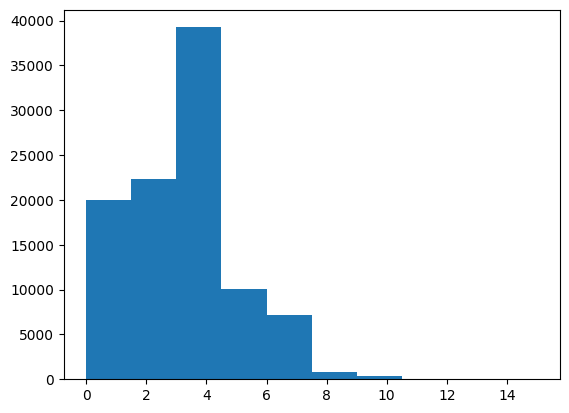

In [30]:
import numpy as np
import matplotlib.pyplot as plt

n = 100000
pois_sample = np.random.poisson(3, size = n) #np.random.exponential(2, size= n)  

# can also try gamma distribution
#shape, scale = 2, 2

# generate distribution
#s = np.random.poisson(3, size =n) # np.random.gamma(shape, scale, n)
# check histogram
plt.hist(pois_sample)
plt.show() 

Now let's randomly take a sample of a fixed size (say 500) from our already generated Poisson distribution and compute its mean. Then repeat this a fair amount of times (let's say N = 1000 repetitions).
Next: Repeat the whole experiment, this time with increased N, and see how the histogram changes!

In [26]:
import random

# number of repetitions 
N_repeat = [1000, 10000, 100000]

In [31]:
# a list of sample means; Con
mean_s = []
# fix a sample size we take from Poisson population each experiment
sample_size = 500
# for each number of sampling (1000 to 50000)
for i in N_repeat:
    # mean of a current sample
    cur_sample_mean = []
    # for current number of repetitions
    for j in range(0,i):
        # sampling 500 sample from population
        rc = random.choices(pois_sample, k=sample_size)
        # collect mean of each sample
        cur_sample_mean.append(np.mean(rc)) #  sum(rc)/len(rc)
    # add mean of each sampling to the list
    mean_s.append(cur_sample_mean)

Now let's look at the histogram of the obtained sample of means  

In [32]:
mean_s

[[3.002,
  3.044,
  3.176,
  2.874,
  2.942,
  3.138,
  3.076,
  3.03,
  3.124,
  3.004,
  3.134,
  3.076,
  2.93,
  3.052,
  3.246,
  3.012,
  2.928,
  2.97,
  3.02,
  3.034,
  2.826,
  3.068,
  3.08,
  3.046,
  2.992,
  2.928,
  2.838,
  3.014,
  2.868,
  3.028,
  2.966,
  2.972,
  2.974,
  3.04,
  3.086,
  2.876,
  2.994,
  3.082,
  3.076,
  3.028,
  2.846,
  3.012,
  2.988,
  3.0,
  2.962,
  2.99,
  2.96,
  2.93,
  3.124,
  2.92,
  3.094,
  2.904,
  2.94,
  2.984,
  3.198,
  3.104,
  2.978,
  3.002,
  3.018,
  3.134,
  2.922,
  2.982,
  3.006,
  2.972,
  3.026,
  3.07,
  3.188,
  3.004,
  2.944,
  3.014,
  2.972,
  3.042,
  3.092,
  3.138,
  2.998,
  2.9,
  2.978,
  3.054,
  2.946,
  3.046,
  3.02,
  3.036,
  3.106,
  2.934,
  2.954,
  3.036,
  3.046,
  2.942,
  3.03,
  3.064,
  3.158,
  2.866,
  3.046,
  2.91,
  3.08,
  2.896,
  2.924,
  3.082,
  2.99,
  3.036,
  2.996,
  2.902,
  2.984,
  3.01,
  2.948,
  3.03,
  2.968,
  3.05,
  2.97,
  3.176,
  2.874,
  2.938,
  3.036,
  2.964,

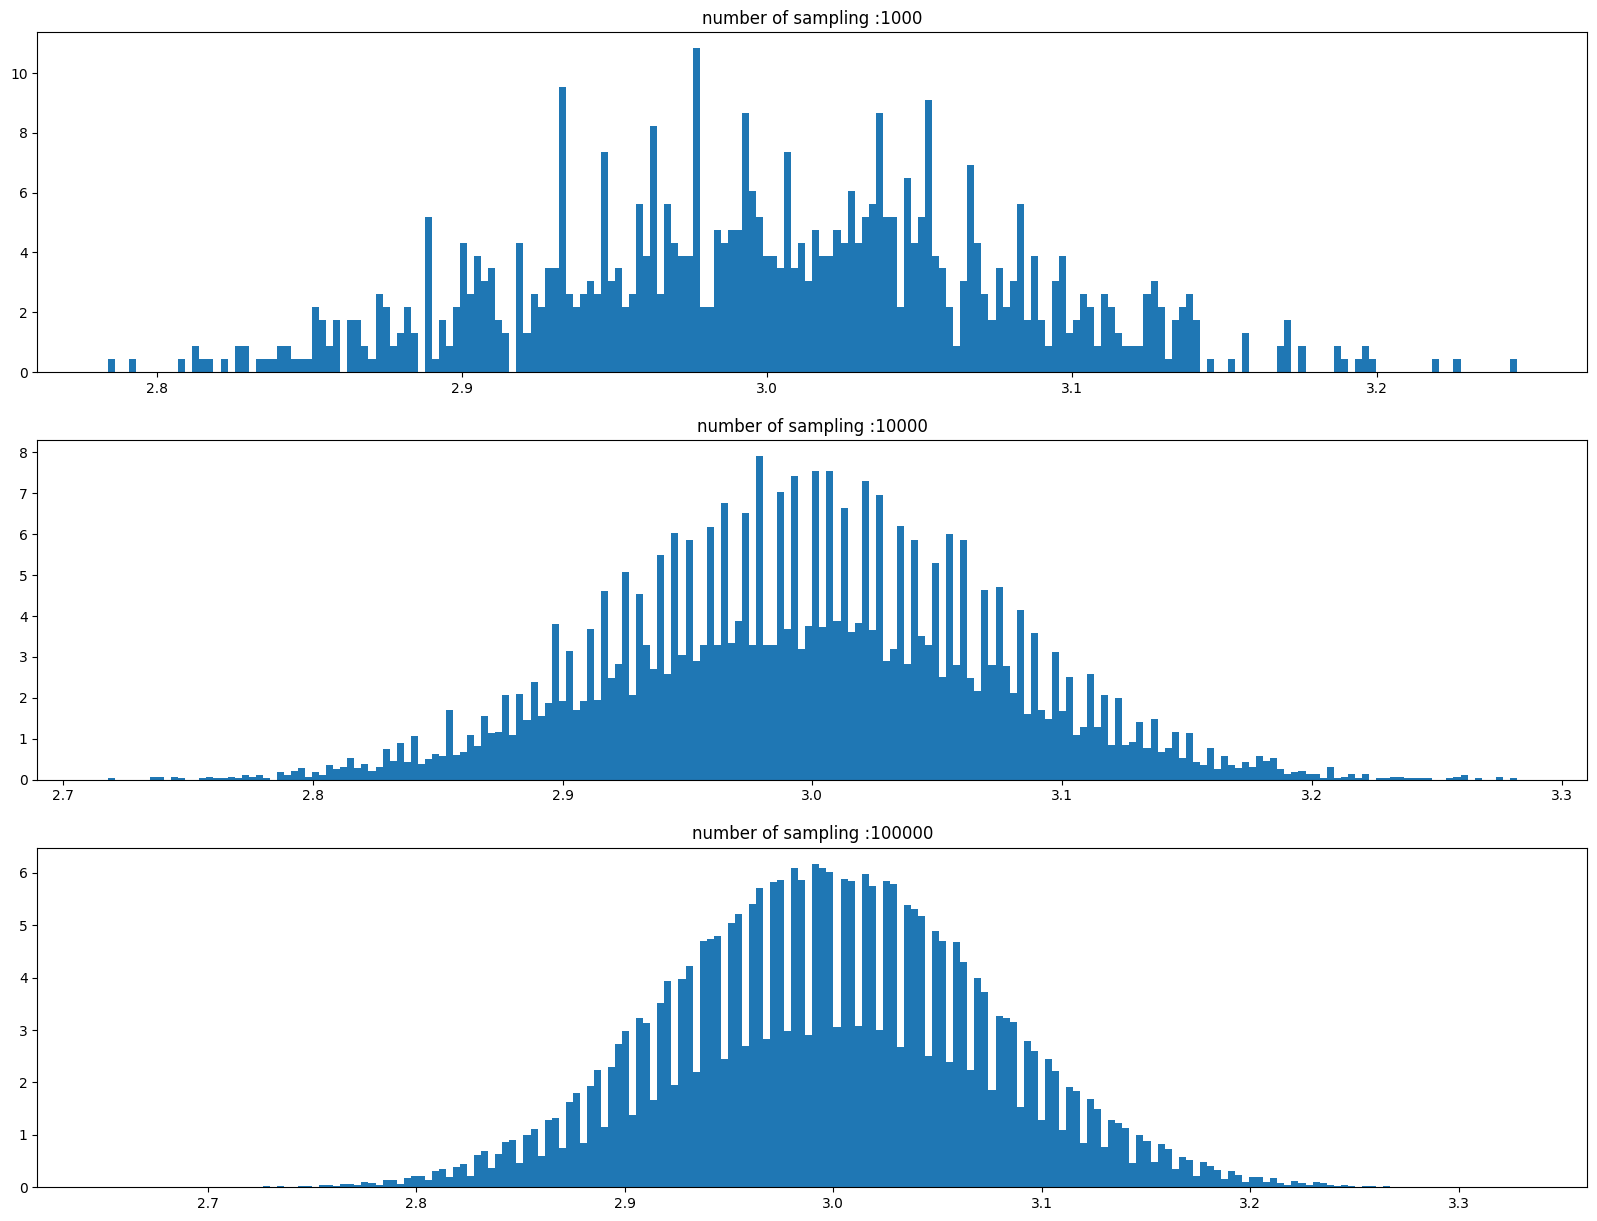

In [33]:
import matplotlib.pyplot as plt
cols = 1
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(20,15))
n = 0
for i in range(0, rows):
    #for j in range(0, cols):
        ax[i].hist(mean_s[n], 200, density=True)
        ax[i].set_title(label="number of sampling :" + str(N_repeat[n]))
        n += 1
plt.show()

Estimate proportion of the population, for example the proportion of people who have certain eye color

In [34]:
# generate a population as a tuple and assign an eye color 
population_eye_color = (['blue']*1000) + (['green']*2500) + (['gray']*3000) + (['brown']*3500) +(['mixed']*2000)

# get all colors (take unique values from the list)
all_colors = set(population_eye_color)

print(population_eye_color)

random.shuffle(population_eye_color)

print(population_eye_color)


type(population_eye_color)


#population_eye_color = list(population_eye_color)

# sample 500 values 
k = 500

rand_samp = random.sample(population_eye_color, k)


# for each color in the list compute the proportion relative to the whole population and the proportion in a sample
for cur_color in all_colors:
    print(cur_color, ' real proportion:', population_eye_color.count(cur_color)/len(population_eye_color), ', sample estimate:', rand_samp.count(cur_color)/len(rand_samp))




['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',

Some work with point estimates: generate a population then compute a point estimate

In [46]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math


# geenrate some data from Poisson distribution
population= stats.poisson.rvs(mu=10, size=1500000)
#population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
#population_ages = np.concatenate((population_ages1, population_ages2))


rand_sample = np.random.choice(a= population, size=500)

print(rand_sample.mean())
print(population.mean())

9.932
10.003791333333334


Let's check how precise are the estimates by computing the confidnce interval for them

In [ ]:
population_samp = np.array(np.random.choice(population, 1000))

9.99

In [56]:
population_samp = np.array(np.random.choice(population, 500))
# compute 95-% CI. Then the quantile
z = 1.96
ci_lower = population_samp.mean() -  z * (population_samp.std()/np.sqrt(k))
ci_upper = population_samp.mean() +  z * (population_samp.std()/np.sqrt(k))

true_mean = population.mean()
print('The 95-% CI: ', ci_lower, ci_upper)
print('True mean: ', true_mean)


The 95-% CI:  9.856530029203498 10.243469970796504
True mean:  10.003791333333334


Some material from Utils.py

In [ ]:
# dont forget to import utils using modules
from utils import makeEDF, plotEDF, basic_stats

import numpy as np
import pandas as pd

# data contains both numerical and categorical values
my_data  = pd.read_csv('breast_cancer.csv')

my_data['radius_mean']
# info from data
basic_stats(my_data['radius_mean'])

# mean, st devation, skewness (asymmetry), and kurtosis (measure of extreme values)

#High kurtosis: heavy tails, more extreme values.
#Low kurtosis: light tails, fewer extreme values.

# build a histogram



mean: 14.13	std: 3.52	skew: 0.94	kurtosis: 3.83


Plotting of histogram and distribution functions

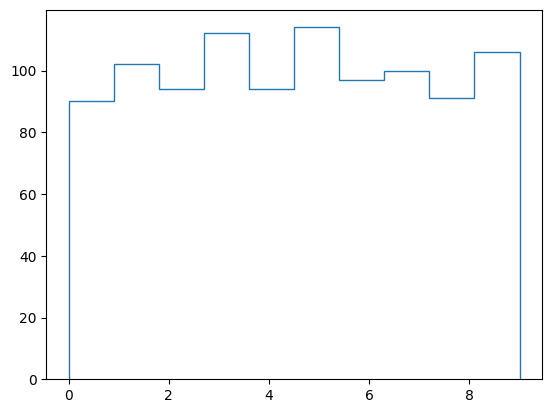

In [43]:
r = np.random.randint(0, 10, size = 1000)

counts, bins = np.histogram(r)
plt.stairs(counts, bins)
plt.show()





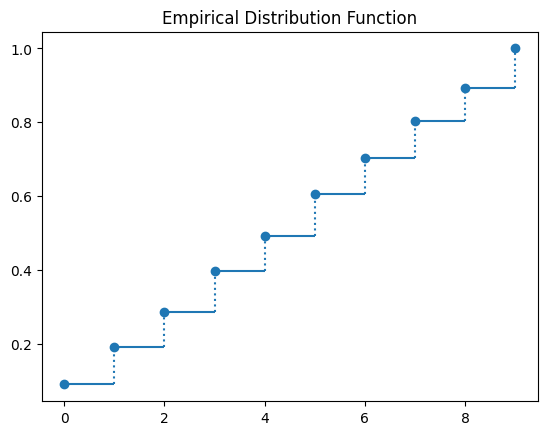

In [44]:
my_edf = makeEDF(r)
my_edf

plotEDF(my_edf)